In [143]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [144]:
trainset = pd.read_csv("archive/train.csv")
testset = pd.read_csv("archive/test_public.csv")

In [71]:
print(trainset.shape, testset.shape)

(1710670, 9) (320, 8)


In [58]:
# trainset.drop(trainset[trainset["MISSING_DATA"] == True].index, inplace=True)

In [59]:
trainset.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [60]:
testset.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA
0,T1,B,NaN,15.0,20000542,1408039037,A,False
1,T2,B,NaN,57.0,20000108,1408038611,A,False
2,T3,B,NaN,15.0,20000370,1408038568,A,False
3,T4,B,NaN,53.0,20000492,1408039090,A,False
4,T5,B,NaN,18.0,20000621,1408039177,A,False


In [145]:
def polyline_to_trip_duration(polyline):
  return max(polyline.count("[") - 2, 0) * 15

trainset["LEN"] = trainset["POLYLINE"].apply(polyline_to_trip_duration)

## Problem 1B

In [91]:
print(trainset['LEN'].quantile([0, 0.25, 0.5, 0.75, 1]))
print(trainset['LEN'].mean())
print(trainset['LEN'].std())

0.00        0.0
0.25      405.0
0.50      600.0
0.75      870.0
1.00    58200.0
Name: LEN, dtype: float64
716.4264615618442
684.7511617508213


Text(0.5, 1.0, 'Trip length distribution')

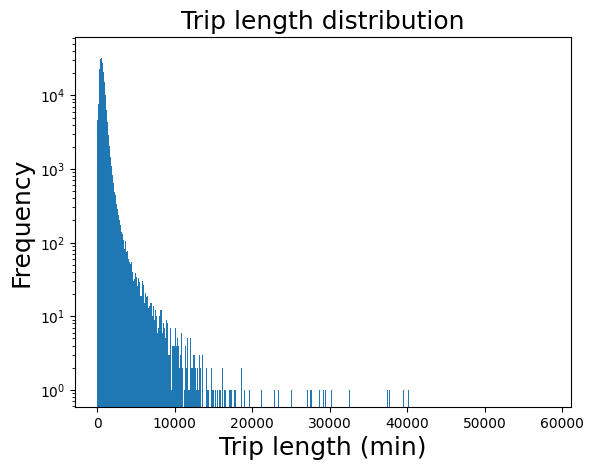

In [114]:
plt.hist(trainset["LEN"], bins=range(0, trainset["LEN"].max()+15, 15), log=True)
plt.xlabel("Trip length (min)", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title("Trip length distribution", fontsize=18)

(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 4.0000000e+00,
         1.0000000e+00, 2.0000000e+00, 3.0000000e+00, 1.0000000e+00,
         1.0000000e+00, 1.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 4.3000000e+02, 3.6409000e+04,
         8.3206766e+07, 1.6575900e+05, 5.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.

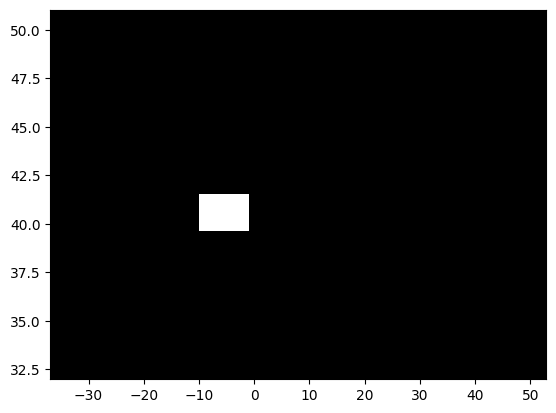

In [93]:
longitude, lattitude = [], []
for polyline in trainset["POLYLINE"]:
    polyline = polyline.replace("[", "").replace("]", "").split(",")
    polyline = [float(x) for x in polyline if x != ""]
    longitude += polyline[::2]
    lattitude += polyline[1::2]


In [98]:
print(min(longitude), max(longitude), min(lattitude), max(lattitude))

-36.913779 52.900803 31.992111 51.037119


Text(0.5, 1.0, 'Trip position distribution')

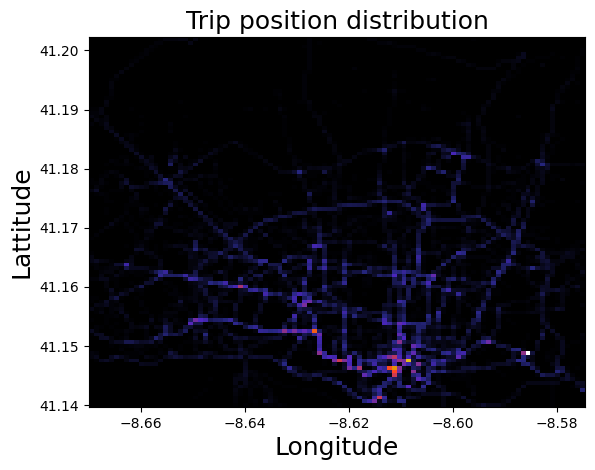

In [121]:
plt.hist2d(longitude, lattitude, cmap="CMRmap", bins=[100, 100], range=[np.quantile(longitude, [0.05, 0.95]), np.quantile(lattitude, [0.05, 0.95])])
plt.xlabel("Longitude", fontsize=18)
plt.ylabel("Lattitude", fontsize=18)
plt.title("Trip position distribution", fontsize=18)

## Problem 1B Done

In [146]:
from datetime import datetime
def parse_time(x):
  dt = datetime.fromtimestamp(x["TIMESTAMP"])
  return dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.weekday()

trainset[["YR", "MON", "DAY", "HR", "MIN", "WK"]] = trainset[["TIMESTAMP"]].apply(parse_time, axis=1, result_type="expand")
testset[["YR", "MON", "DAY", "HR", "MIN", "WK"]] = testset[["TIMESTAMP"]].apply(parse_time, axis=1, result_type="expand")

In [63]:
trainset.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,LEN,YR,MON,DAY,HR,MIN,WK
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",330,2013,6,30,17,0,6
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",270,2013,6,30,17,8,6
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",960,2013,6,30,17,2,6
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",630,2013,6,30,17,0,6
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",420,2013,6,30,17,4,6


In [64]:
testset.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,YR,MON,DAY,HR,MIN,WK
0,T1,B,NaN,15.0,20000542,1408039037,A,False,2014,8,14,10,57,3
1,T2,B,NaN,57.0,20000108,1408038611,A,False,2014,8,14,10,50,3
2,T3,B,NaN,15.0,20000370,1408038568,A,False,2014,8,14,10,49,3
3,T4,B,NaN,53.0,20000492,1408039090,A,False,2014,8,14,10,58,3
4,T5,B,NaN,18.0,20000621,1408039177,A,False,2014,8,14,10,59,3


In [147]:
trainset.drop(trainset[trainset["MISSING_DATA"] == True].index, inplace=True)
trainset.drop(trainset[trainset["LEN"] == 0].index, inplace=True)

bad_columns = ["TRIP_ID", "DAY_TYPE", "TIMESTAMP", "MISSING_DATA"]
trainset.drop(columns=bad_columns + ["POLYLINE"], inplace=True)
testset.drop(columns=bad_columns, inplace=True)

In [148]:
index_columns = ["CALL_TYPE", "TAXI_ID"]
for col in index_columns:
    arr = list(set(trainset[col]).union(set(testset[col])))
    mapping = {}
    for i in range(len(arr)):
        mapping[arr[i]] = i
    trainset[col] = trainset[col].apply(lambda x: mapping[x])
    testset[col] = testset[col].apply(lambda x: mapping[x])

In [68]:
trainset.head()

,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,LEN,YR,MON,DAY,HR,MIN,WK
0,1,NaN,NaN,374,330,2013,6,30,17,0,6
1,0,NaN,7.0,378,270,2013,6,30,17,8,6
2,1,NaN,NaN,211,960,2013,6,30,17,2,6
3,1,NaN,NaN,337,630,2013,6,30,17,0,6
4,1,NaN,NaN,224,420,2013,6,30,17,4,6


## Model

In [153]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader

In [150]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_sizes):
        super().__init__()
        self.linear = nn.Linear(input_size, hidden_sizes[0])
        self.relu = nn.ReLU()
        self.hidden_layers = nn.ModuleList()
        for i in range(len(hidden_sizes) - 1):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
        self.output_layer = nn.Linear(hidden_sizes[-1], 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        for layer in self.hidden_layers:
            x = layer(x)
            x = self.relu(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

In [161]:
device = torch.device("mps")

X_train = torch.tensor(trainset.drop(columns=["LEN"]).values, dtype=torch.float32).to(device)
y_train = torch.tensor(trainset["LEN"].values, dtype=torch.float32).to(device)

X_test = torch.tensor(testset.values, dtype=torch.float32).to(device)

print(X_train.shape, y_train.shape, X_test.shape)

torch.Size([1674152, 10]) torch.Size([1674152]) torch.Size([320, 10])


In [195]:
batch_size = 32
input_size = trainset.shape[1] - 1
hidden_sizes = [1024, 256, 128, 128]

model = Model(input_size, hidden_sizes).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-6)

trainloader = DataLoader(TensorDataset(X_train[:500], y_train[:500]), batch_size=batch_size, shuffle=True)

In [196]:
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for input, target in trainloader:
        input = input.to(device)
        target = target.to(device)

        outputs = model(input)

        outputs = outputs.squeeze()

        loss = criterion(outputs, target)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {epoch+1} loss: {running_loss}")

Epoch 1 loss: 10837295.9375
Epoch 2 loss: 11056925.625
Epoch 3 loss: 10894491.71875
Epoch 4 loss: 10933553.0625
Epoch 5 loss: 11058546.6875
Epoch 6 loss: 10911915.21875
Epoch 7 loss: 10967236.34375
Epoch 8 loss: 11032877.15625
Epoch 9 loss: 11022449.8125
Epoch 10 loss: 10911523.6875
